<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ex13_resampling_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/resampling-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
getwd()

[1] "/content"

In [16]:
library(tidyverse)

df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d1 <- df %>%
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()
head(d1)



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

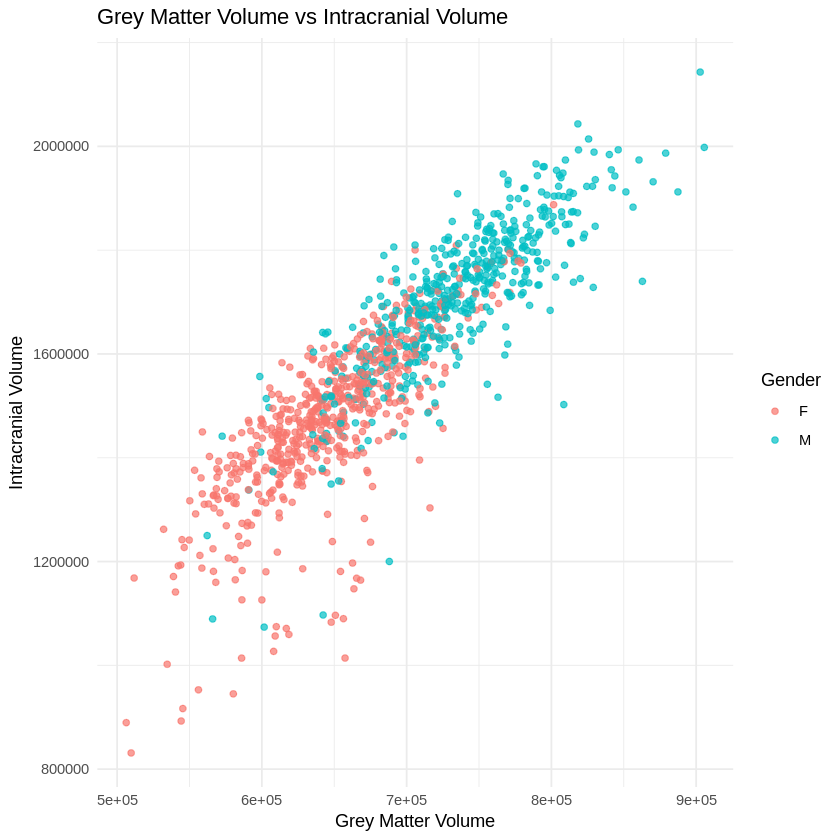

In [3]:
library(ggplot2)
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) +
  geom_point(alpha = 0.7) +
  labs(title = "Grey Matter Volume vs Intracranial Volume",
       x = "Grey Matter Volume",
       y = "Intracranial Volume",
       color = "Gender") +
  theme_minimal()



What patterns do you observe in the scatter plot?




> There is a strong correlation between grey matter volume and intracranial volume because there is a linear slope across both clusters. The clusters are based on gender, with male participants having greater volume both intracranial and grey matter than women.


---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [27]:
head(d1)
dim(d1)

d1$Gender <- as.factor(d1$Gender)

table(d1$Gender)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


[1] 1113    6


  F   M 
606 507 

In [19]:

logistic_model <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
                      data = d1,
                      family = binomial)
summary(logistic_model)




Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Total grey matter volume matter and intracranial volume are significantly associated with gender where one unit increase in total grey matter volume and intracranial volum increases the log-odds of the participant being Male.  
>

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [23]:
predicted_probs <- predict(logistic_model, type = "response")

predicted_classes <- ifelse(predicted_probs >= 0.5, "M", "F")

accuracy <- mean(predicted_classes == d1$Gender)

print(round(accuracy * 100, 2))


[1] 82.03


What is the prediction accuracy for gender from the full model?

>The full model has a prediction accuracy of 82.03% for gender.
>

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$).

Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


        (Intercept)       FS_Tot_WM_Vol     FS_Total_GM_Vol FS_IntraCranial_Vol 
      -2.261599e+01        2.139610e-06        1.959056e-05        5.019787e-06 
        (Intercept)       FS_Tot_WM_Vol     FS_Total_GM_Vol FS_IntraCranial_Vol 
      -2.261599e+01        2.139610e-06        1.959056e-05        5.019787e-06 

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -2.261599e+01 -1.583661e-01 1.467808e+00
t2*  2.139610e-06 -2.539106e-07 3.224836e-06
t3*  1.959056e-05  3.337793e-08 3.247365e-06
t4*  5.019787e-06  1.530948e-07 1.419914e-06


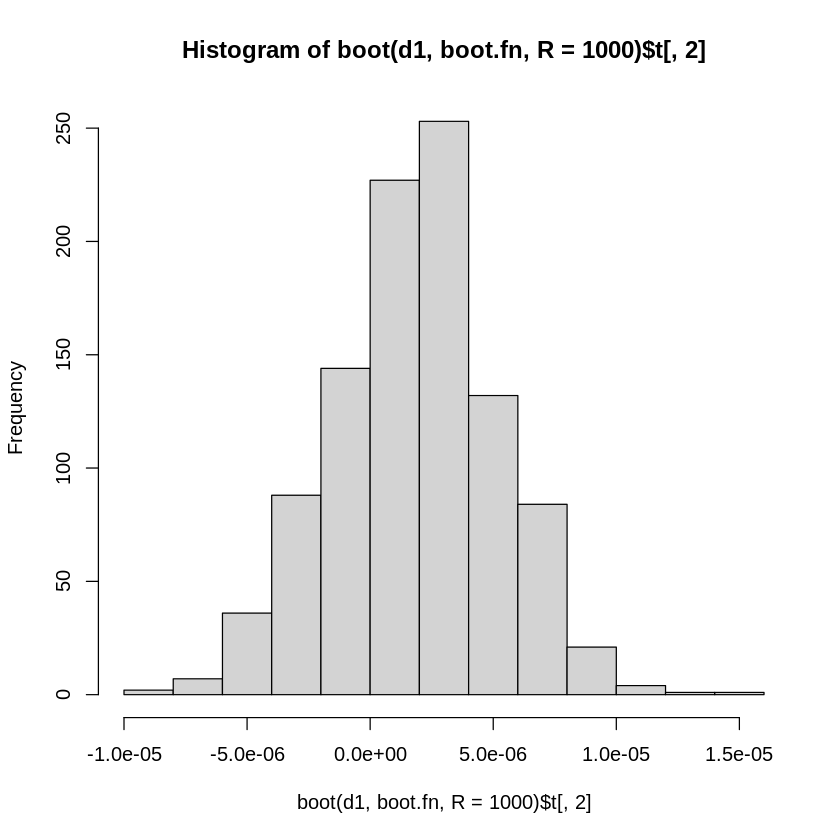

[1] "95% Confidence Interval for Accuracy: [0.809, 0.8272]"


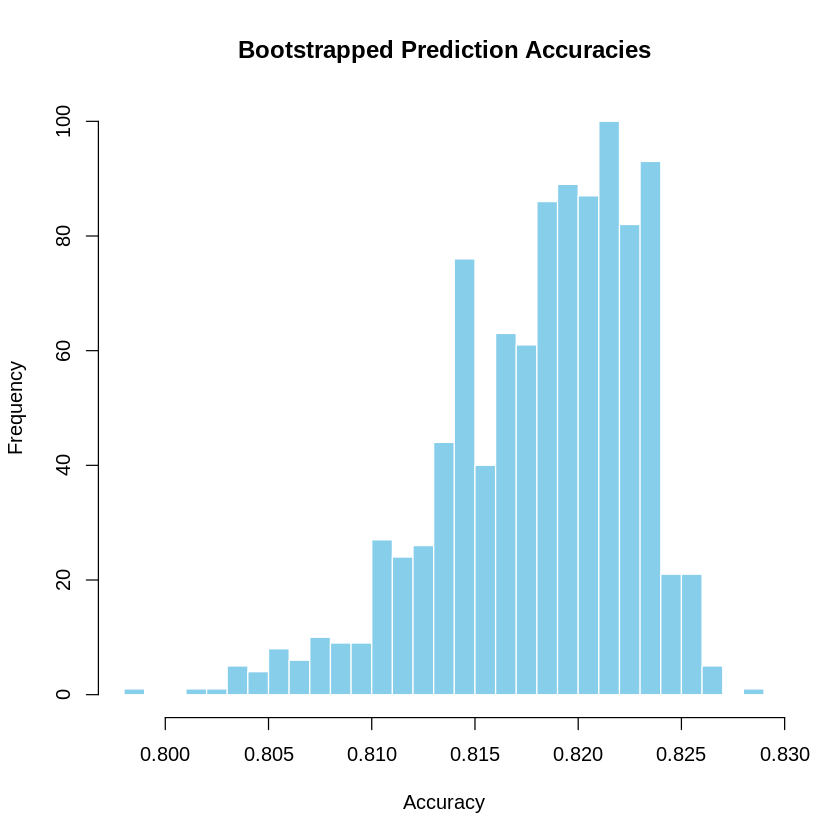

In [39]:
set.seed(123)
library(boot)


boot.fn <- function(data, index){
  return(coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
                      data = d1,
                      family = binomial, subset = index)))
}

print(boot.fn(d1, 1:1113))
print(coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
                      data = d1,
                      family = binomial))) #sanity check


boot_obj = boot(d1, boot.fn, R=1000)
print(boot_obj)


hist(boot(d1, boot.fn, R = 1000)$t[,2])



# Calculate standard deviation of bootstrapped accuracies (for confidence intervals)
accuracy_sd <- sd(boot_accuracies)

# Estimate 95% confidence intervals using mean ± 1.96 * sd (approximate normal CI)
accuracy_mean <- mean(boot_accuracies)
ci_lower <- accuracy_mean - 1.96 * accuracy_sd
ci_upper <- accuracy_mean + 1.96 * accuracy_sd

# Print the confidence interval
print(paste("95% Confidence Interval for Accuracy: [", round(ci_lower, 4), ", ", round(ci_upper, 4), "]", sep = ""))



2.5%     97.5% 
0.6524437 0.7268212

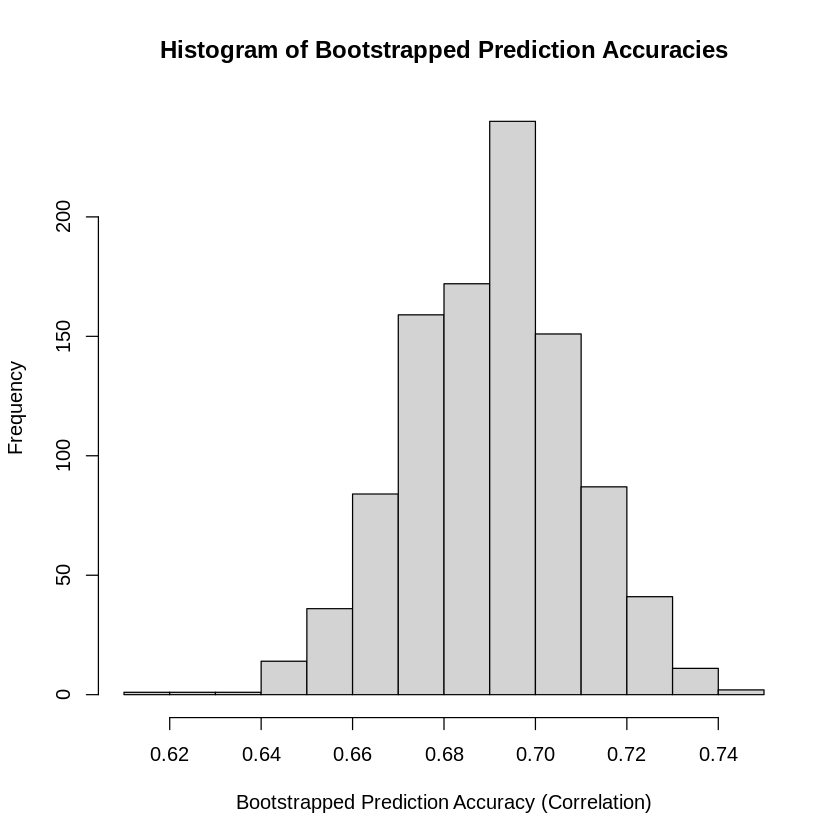

In [43]:
# Define bootstrapping function
boot.fn <- function(data, index) {
  # Subset data using resampled indices
  resampled_data <- data[index, ]
  resampled_data$Gender <- as.numeric(resampled_data$Gender) - 1
  # Fit the logistic regression model using the resampled data
  model <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol,
               data = resampled_data,
               family = binomial)

  # Predict the probabilities (predicted values)
  preds <- predict(model, type = "response", newdata = resampled_data)

  # Calculate the correlation between actual and predicted values
  return(cor(resampled_data$Gender, preds))  # Correlation as the accuracy metric
}

boot_obj <- boot(d1, boot.fn, R = 1000)

hist(boot_obj$t,
     xlab = "Bootstrapped Prediction Accuracy (Correlation)",
     main = "Histogram of Bootstrapped Prediction Accuracies")

quantile(boot_obj$t, probs = c(0.025, 0.975))


How robust is the prediction accuracy of the full model?

> There is moderate fluctuation in accuracy which indicates a lack of robustness given the 7% range in the confidence interval size and the model is sensitive to the specifc data used.
>

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

In [61]:
set.seed(42)  # For reproducibility
d1$Gender <- as.numeric(d1$Gender)-1
head(d1)
permd1 = d1

head(permd1)

R=1000


perm.coefs=matrix(NA,nrow=R, ncol=2)

for (i in 1:R){
  permd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(1113)] # This is a shuffled version of the Auto$horsepower vector
   # Fit the model on the permuted data and store the coefficient for grey matter volume
  fit <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permd1, family = binomial)

  # Store only the coefficient for FS_Total_GM_Vol (which is at position 2)
  perm.coefs[i, 2] <- coef(fit)[2]

  }

# Take a look at the null distributions
hist(perm.coefs[,2])



# Now re-estimate the real (unpermuted) effect
perm.real = coef(glm(Gender~FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=d1))
perm.real

abline(v = perm.real[2], col = "red", lwd = 2)



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,100206,-2,130.42,1864518,543134,807245
2,100307,-3,112.56,1512540,407292,664124
3,100408,-2,121.18,1684117,500417,726206
4,100610,-2,126.53,1816044,512946,762308
5,101006,-3,101.85,1437868,429449,579632
6,101107,-2,107.04,1512727,416995,665024


,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,100206,-2,130.42,1864518,543134,807245
2,100307,-3,112.56,1512540,407292,664124
3,100408,-2,121.18,1684117,500417,726206
4,100610,-2,126.53,1816044,512946,762308
5,101006,-3,101.85,1437868,429449,579632
6,101107,-2,107.04,1512727,416995,665024


ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


How much does the grey matter volume influence the prediction accuracy of the model?

> *Write your response here*
>

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> The **bootstrap** is a resampling technique where multiple datasets are created by sampling with replacement from the original dataset to estimate the distribution of a statistic (like mean, variance, or prediction accuracy) and assess uncertainty or variability, without making strong assumptions about the data’s underlying distribution. It’s particularly useful when dealing with small sample sizes or when it’s difficult to rely on parametric assumptions, allowing for the estimation of confidence intervals, standard errors, and model performance. On the other hand, a **permutation test** is used to evaluate the significance of a relationship or difference between groups by randomly shuffling labels or data values and comparing the observed statistic to a distribution of statistics generated under the null hypothesis (i.e., by permuting the data). It is most appropriate when testing hypotheses about **how much a feature contributes to a model’s performance** or to assess the significance of a test statistic in a given context, with the key difference being that permutation tests focus on testing the null hypothesis and comparison with a randomized distribution, while bootstrapping is more about estimating the uncertainty of a statistic.

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*